In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [43]:
df = pd.read_csv("credit_card_fraud_dataset.csv")
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [44]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [45]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [46]:
df["Year"] = df["TransactionDate"].dt.year
df["Month"] = df["TransactionDate"].dt.month
df["Day"] = df["TransactionDate"].dt.day
df["Hour"] = df["TransactionDate"].dt.hour
df["Minute"] = df["TransactionDate"].dt.minute
df["Second"] = df["TransactionDate"].dt.second
df = df.drop(columns=["TransactionDate"])

In [47]:
df.head()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour,Minute,Second
0,1,4189.27,688,refund,San Antonio,0,2024,4,3,14,15,35
1,2,2659.71,109,refund,Dallas,0,2024,3,19,13,20,35
2,3,784.00,394,purchase,New York,0,2024,1,8,10,8,35
3,4,3514.40,944,purchase,Philadelphia,0,2024,4,13,23,50,35
4,5,369.07,475,purchase,Phoenix,0,2024,7,12,18,51,35


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   Amount           100000 non-null  float64
 2   MerchantID       100000 non-null  int64  
 3   TransactionType  100000 non-null  object 
 4   Location         100000 non-null  object 
 5   IsFraud          100000 non-null  int64  
 6   Year             100000 non-null  int64  
 7   Month            100000 non-null  int64  
 8   Day              100000 non-null  int64  
 9   Hour             100000 non-null  int64  
 10  Minute           100000 non-null  int64  
 11  Second           100000 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 9.2+ MB


In [49]:
df.describe()

,TransactionID,Amount,MerchantID,IsFraud,Year,Month,Day,Hour,Minute,Second
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000,2023.804490,6.516240,15.782220,11.50084,29.567990,35.064360
std,28867.657797,1442.415999,288.715868,0.099499,0.396595,3.448248,8.813795,6.91768,17.310902,0.245394
min,1.000000,1.050000,1.000000,0.000000,2023.000000,1.000000,1.000000,0.00000,0.000000,35.000000
25%,25000.750000,1247.955000,252.000000,0.000000,2024.000000,4.000000,8.000000,6.00000,15.000000,35.000000
50%,50000.500000,2496.500000,503.000000,0.000000,2024.000000,7.000000,16.000000,12.00000,30.000000,35.000000
75%,75000.250000,3743.592500,753.000000,0.000000,2024.000000,10.000000,23.000000,17.00000,45.000000,35.000000
max,100000.000000,4999.770000,1000.000000,1.000000,2024.000000,12.000000,31.000000,23.00000,59.000000,36.000000


In [50]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(["TransactionID", "IsFraud"])



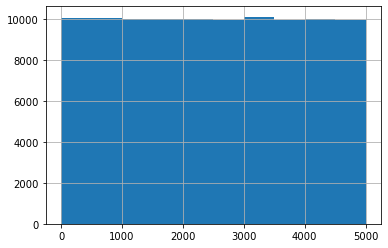

In [51]:
df['Amount'].hist()
plt.show()

In [52]:
df['IsFraud'].value_counts()

0    99000
1     1000
Name: IsFraud, dtype: int64

<AxesSubplot:title={'center':'Target Variable counts'}>

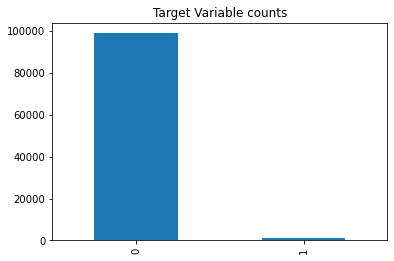

In [53]:
df['IsFraud'].value_counts().plot(kind='bar',title='Target Variable counts')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'San Antonio'),
  Text(1, 0, 'Dallas'),
  Text(2, 0, 'New York'),
  Text(3, 0, 'Philadelphia'),
  Text(4, 0, 'Phoenix'),
  Text(5, 0, 'Chicago'),
  Text(6, 0, 'San Jose'),
  Text(7, 0, 'San Diego'),
  Text(8, 0, 'Houston'),
  Text(9, 0, 'Los Angeles')])

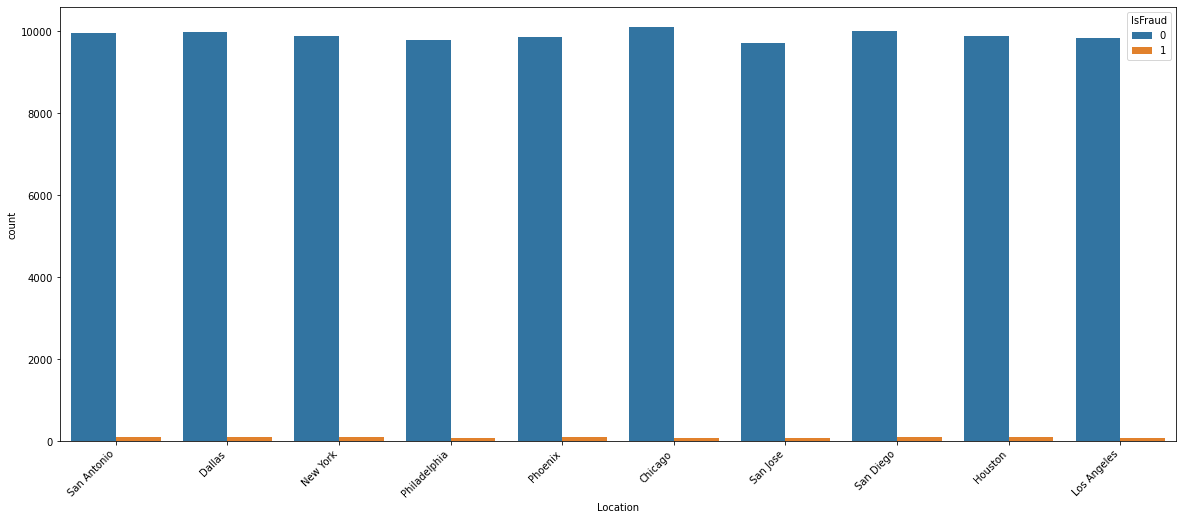

In [54]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x=df['Location'],hue='IsFraud')
plt.xticks(rotation=45, ha='right') 

(array([0, 1]), [Text(0, 0, 'refund'), Text(1, 0, 'purchase')])

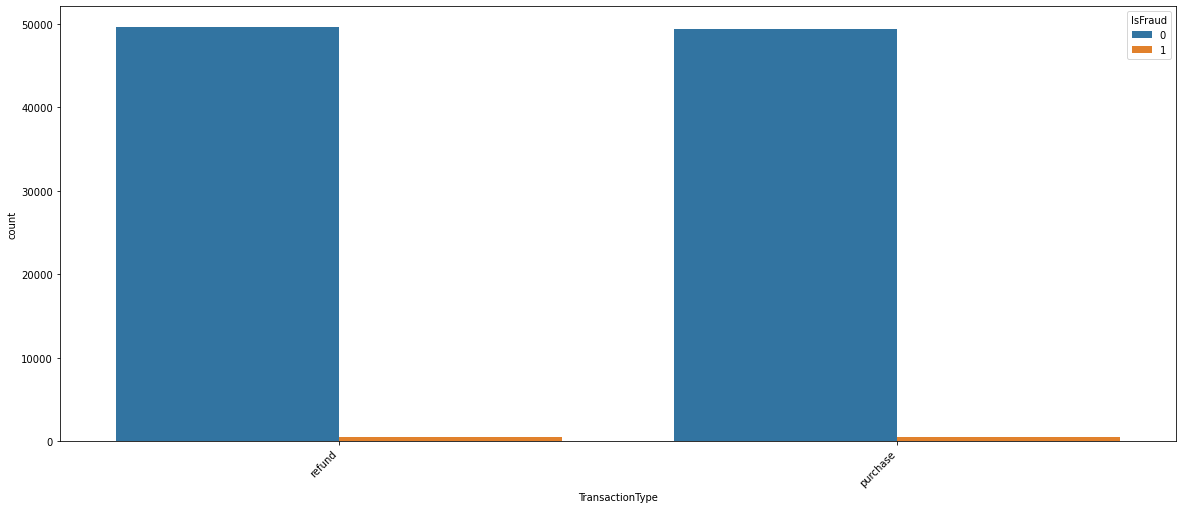

In [55]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x=df['TransactionType'],hue='IsFraud')
plt.xticks(rotation=45, ha='right') 

In [56]:
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded.head()

,TransactionID,Amount,MerchantID,IsFraud,Year,Month,Day,Hour,Minute,Second,TransactionType_refund,Location_Dallas,Location_Houston,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose
0,1,4189.27,688,0,2024,4,3,14,15,35,1,0,0,0,0,0,0,1,0,0
1,2,2659.71,109,0,2024,3,19,13,20,35,1,1,0,0,0,0,0,0,0,0
2,3,784.00,394,0,2024,1,8,10,8,35,0,0,0,0,1,0,0,0,0,0
3,4,3514.40,944,0,2024,4,13,23,50,35,0,0,0,0,0,1,0,0,0,0
4,5,369.07,475,0,2024,7,12,18,51,35,0,0,0,0,0,0,1,0,0,0


In [57]:
corr=df_encoded.corr()
corr

,TransactionID,Amount,MerchantID,IsFraud,Year,Month,Day,Hour,Minute,Second,TransactionType_refund,Location_Dallas,Location_Houston,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose
TransactionID,1.000000,0.001972,-0.003623,-0.000209,-0.001604,0.005606,0.003219,0.000858,-0.000769,0.425033,0.005069,-0.002669,-0.000792,0.001795,-0.006046,-0.000948,0.002167,-0.001146,0.001289,0.002811
Amount,0.001972,1.000000,-0.000386,0.001399,0.004161,0.000327,-0.000426,0.000494,0.000160,0.000997,-0.002321,-0.001026,0.003120,-0.000938,-0.001188,-0.000135,0.002838,-0.002883,-0.001787,0.001938
MerchantID,-0.003623,-0.000386,1.000000,0.001157,0.002067,-0.001496,-0.002447,-0.000222,0.005218,0.000619,-0.002766,0.003086,-0.001849,-0.000635,0.002441,-0.002654,-0.001294,-0.002739,0.001413,0.000442
IsFraud,-0.000209,0.001399,0.001157,1.000000,0.003931,-0.004700,-0.002283,-0.005838,0.000621,-0.003014,0.001144,-0.000588,0.001706,-0.001465,0.005385,-0.002941,-0.000201,-0.000541,0.004631,-0.003734
Year,-0.001604,0.004161,0.002067,0.003931,1.000000,-0.682501,-0.087533,-0.001659,-0.000472,-0.001716,-0.003777,0.001253,0.002803,-0.003575,0.000818,0.001375,-0.001324,-0.000736,-0.000769,0.003729
Month,0.005606,0.000327,-0.001496,-0.004700,-0.682501,1.000000,0.006267,-0.001788,0.000227,0.003858,0.001470,-0.003022,-0.000210,-0.002960,-0.001052,0.003764,-0.004704,0.000729,0.000753,0.000714
Day,0.003219,-0.000426,-0.002447,-0.002283,-0.087533,0.006267,1.000000,0.002577,-0.001462,-0.001967,-0.003668,-0.003089,0.000393,0.000151,-0.001588,-0.002141,-0.001765,-0.003786,0.003071,0.002626
Hour,0.000858,0.000494,-0.000222,-0.005838,-0.001659,-0.001788,0.002577,1.000000,-0.002713,0.000958,-0.000982,-0.000900,0.001818,0.001414,0.000073,0.003834,0.001543,-0.001122,-0.001352,-0.002619
Minute,-0.000769,0.000160,0.005218,0.000621,-0.000472,0.000227,-0.001462,-0.002713,1.000000,-0.000769,-0.004308,-0.000225,-0.002691,0.001878,0.001219,-0.001855,0.002617,0.001571,0.000309,-0.004730
Second,0.425033,0.000997,0.000619,-0.003014,-0.001716,0.003858,-0.001967,0.000958,-0.000769,1.000000,-0.002317,0.002100,-0.003264,0.006882,-0.003010,0.002264,-0.003405,-0.008072,0.004630,0.002323


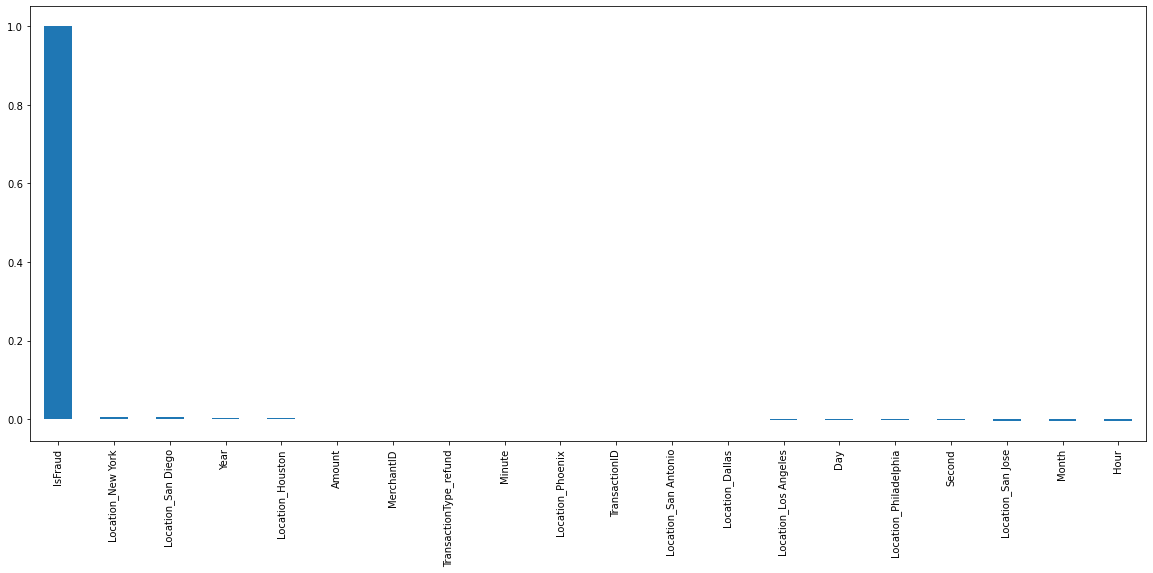

In [58]:
plt.figure(figsize=(20,8))
corr['IsFraud'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [59]:
X=df_encoded.drop('IsFraud',axis=1)
y=df_encoded['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.20,stratify=y)

y_test.shape, X_test.shape

((20000,), (20000, 19))

In [60]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TransactionID           100000 non-null  int64  
 1   Amount                  100000 non-null  float64
 2   MerchantID              100000 non-null  int64  
 3   IsFraud                 100000 non-null  int64  
 4   Year                    100000 non-null  int64  
 5   Month                   100000 non-null  int64  
 6   Day                     100000 non-null  int64  
 7   Hour                    100000 non-null  int64  
 8   Minute                  100000 non-null  int64  
 9   Second                  100000 non-null  int64  
 10  TransactionType_refund  100000 non-null  uint8  
 11  Location_Dallas         100000 non-null  uint8  
 12  Location_Houston        100000 non-null  uint8  
 13  Location_Los Angeles    100000 non-null  uint8  
 14  Location_New York    

In [61]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [62]:
#applying logistic regression model
LR = LogisticRegression(random_state=1)
LR.fit(X_train,y_train)
y_pred1=LR.predict(X_test)

In [63]:
print("Accuracy Score =",accuracy_score(y_test,y_pred1))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred1))

print(classification_report(y_test,y_pred1,labels=[0,1]))

Accuracy Score = 0.99
confusion matrix:
 [[19800     0]
 [  200     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
KNN=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
KNN.fit(X_train, y_train)
y_pred2=KNN.predict(X_test)

In [65]:
print("Accuracy Score =",accuracy_score(y_test,y_pred2))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred2))

print(classification_report(y_test,y_pred2,labels=[0,1]))

Accuracy Score = 0.99
confusion matrix:
 [[19800     0]
 [  200     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
RF=RandomForestClassifier(random_state=1)
RF.fit(X_train,y_train)
y_pred3=RF.predict(X_test)
     


In [67]:
print("Accuracy Score =",accuracy_score(y_test,y_pred3))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred3))

print(classification_report(y_test,y_pred3,labels=[0,1]))

Accuracy Score = 0.99
confusion matrix:
 [[19800     0]
 [  200     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [69]:
LR = LogisticRegression(random_state=1)
LR.fit(X_train_resampled,y_train_resampled)
y_pred_resampled1=LR.predict(X_test)

/Users/hamzazidan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print("Accuracy Score =",accuracy_score(y_test,y_pred_resampled1))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_resampled1))

print(classification_report(y_test,y_pred_resampled1,labels=[0,1]))

Accuracy Score = 0.54365
confusion matrix:
 [[10768  9032]
 [   95   105]]
              precision    recall  f1-score   support

           0       0.99      0.54      0.70     19800
           1       0.01      0.53      0.02       200

    accuracy                           0.54     20000
   macro avg       0.50      0.53      0.36     20000
weighted avg       0.98      0.54      0.70     20000



In [71]:
KNN=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
KNN.fit(X_train_resampled, y_train_resampled)
y_pred_resampled2=KNN.predict(X_test)

In [72]:
print("Accuracy Score =",accuracy_score(y_test,y_pred_resampled2))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_resampled2))

print(classification_report(y_test,y_pred_resampled2,labels=[0,1]))

Accuracy Score = 0.774
confusion matrix:
 [[15423  4377]
 [  143    57]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     19800
           1       0.01      0.28      0.02       200

    accuracy                           0.77     20000
   macro avg       0.50      0.53      0.45     20000
weighted avg       0.98      0.77      0.86     20000



In [73]:
RF=RandomForestClassifier(random_state=1)
RF.fit(X_train_resampled,y_train_resampled)
y_pred_resampled3=RF.predict(X_test)
     


In [74]:
print("Accuracy Score =",accuracy_score(y_test,y_pred_resampled3))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_resampled3))
print(classification_report(y_test,y_pred_resampled3,labels=[0,1]))

Accuracy Score = 0.95835
confusion matrix:
 [[19158   642]
 [  191     9]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19800
           1       0.01      0.04      0.02       200

    accuracy                           0.96     20000
   macro avg       0.50      0.51      0.50     20000
weighted avg       0.98      0.96      0.97     20000

